# Pandas

In [ ]:
import pandas as pd

## Create and check Pandas series

In [ ]:
things = pd.Series(data = ["red", "yellow", 2018, 3.14], index = ["apple", "banana", "year", "pi"])
print(things) # prints out series and dtype
print(type(things)) # <class 'pandas.core.series.Series'>
print("Shape:", things.shape) # (4,)
print("Dimension:", things.ndim) # 1
print("Total elements:", things.size) # 4

In [ ]:
check = "apple" in things # true
check2 = "orange" in things # false
print("Apple in things:", check)
print("Orange in things:", check2)

## Accessing and Removing

In [ ]:
# Access by label
print(things["apple"]) # "red"
print(things[["apple", "banana"]]) # series

# Access by index
print(things[0]) # "red"
print(things[-1]) # 3.14
print(things[[0, 1]]) # series

# Access by .loc / .iloc
print(things.loc[["apple", "banana"]]) # series
print(things.iloc[[0, 1]]) # series


In [ ]:
things["apple"] = "green"
things[1] = "ripe"
print(things)


In [ ]:
# remove element; original remains complete
temp = things.drop("year")
print(temp)
print(things)

In [ ]:
# remove element inplace; original is edited
things.drop("year", inplace = True)
print(things)

## Arithmetic Operations on Pandas Series

Just like with NumPy ndarrays, we can perform element-wise arithmetic operations on Pandas Series.

## Panda DataFrames

### Options

In [ ]:
# set the precision of the dataframes to one decimal place.
pd.set_option('precision', 1)

### Creating Pandas DataFrames

In [ ]:
# We create a dictionary of Pandas Series 
items = {'Bob' : pd.Series(data = [245, 25, 55], index = ['bike', 'pants', 'watch']),
         'Alice' : pd.Series(data = [40, 110, 500, 45], index = ['book', 'glasses', 'bike', 'pants'])}

print(type(items))

In [ ]:
# We create a Pandas DataFrame by passing it a dictionary of Pandas Series
shopping_carts = pd.DataFrame(items)

# We display the DataFrame
shopping_carts

In [ ]:
# We create a dictionary of Pandas Series without indexes
data = {'Bob' : pd.Series([245, 25, 55]),
        'Alice' : pd.Series([40, 110, 500, 45])}

# We create a DataFrame
df = pd.DataFrame(data)

# We display the DataFrame
df

In [ ]:
# We print some information about shopping_carts
print('shopping_carts has shape:', shopping_carts.shape)
print('shopping_carts has dimension:', shopping_carts.ndim)
print('shopping_carts has a total of:', shopping_carts.size, 'elements')
print()
print('The data in shopping_carts is:\n', shopping_carts.values)
print()
print('The row index in shopping_carts is:', shopping_carts.index)
print()
print('The column index in shopping_carts is:', shopping_carts.columns)

In [ ]:
# We Create a DataFrame that only has selected items for Alice
alice_sel_shopping_cart = pd.DataFrame(items, index = ['glasses', 'bike'], columns = ['Alice'])

# We display alice_sel_shopping_cart
alice_sel_shopping_cart

In [ ]:
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2'])

# We display the DataFrame
store_items

### Accessing Elements in Pandas DataFrames

In [ ]:
# We print the store_items DataFrame
print(store_items)

# We access rows, columns and elements using labels
print()
print('How many bikes are in each store:\n', store_items[['bikes']])
print()
print('How many bikes and pants are in each store:\n', store_items[['bikes', 'pants']])
print()
print('What items are in Store 1:\n', store_items.loc[['store 1']])
print()
print('How many bikes are in Store 2:', store_items['bikes']['store 2']) # dataframe[column][row]

In [ ]:
# We add a new column named shirts to our store_items DataFrame indicating the number of
# shirts in stock at each store. We will put 15 shirts in store 1 and 2 shirts in store 2
store_items['shirts'] = [15,2]

# We display the modified DataFrame
store_items


In [ ]:
# We create a dictionary from a list of Python dictionaries that will number of items at the new store
new_items = [{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4}]

# We create new DataFrame with the new_items and provide and index labeled store 3
new_store = pd.DataFrame(new_items, index = ['store 3'])

# append to store_items
store_items = store_items.append(new_store)
store_items

In [ ]:
# dataframe.insert(loc,label,data)
store_items.insert(4, 'shoes', [8,5,0])
store_items

In [ ]:
# We remove the watches and shoes columns
store_items = store_items.drop(['watches', 'shoes'], axis = 1)

# We remove the store 2 and store 1 rows
store_items = store_items.drop(['store 2', 'store 1'], axis = 0)

# we display the modified DataFrame
store_items

In [ ]:
# We change the column label bikes to hats
store_items = store_items.rename(columns = {'bikes': 'hats'})

# We change the row label from store 3 to last store
store_items = store_items.rename(index = {'store 3': 'last store'})

# we display the modified DataFrame
store_items

### Dealing with NaN

In [ ]:
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35, 'shirts': 15, 'shoes':8, 'suits':45},
{'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5, 'shirts': 2, 'shoes':5, 'suits':7},
{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4, 'shoes':10}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2', 'store 3'])

# We display the DataFrame
store_items

In [ ]:
# We count the number of NaN values in store_items
x =  store_items.isnull().sum().sum()

x

In [ ]:
# We drop any rows with NaN values; original dataframe is not modified; use inplace = True
store_items.dropna(axis = 0)

# We drop any columns with NaN values; original dataframe is not modified; use inplace = True
store_items.dropna(axis = 1)

# We replace all NaN values with 0
store_items.fillna(0)

# We replace NaN values with the previous value in the column
store_items.fillna(method = 'ffill', axis = 0) # ffill => forwardfill, NaNs in first row are not replaced

# We replace NaN values with the previous value in the row
store_items.fillna(method = 'ffill', axis = 1) # ffill => forwardfill, NaNs in first column are not replaced

# We replace NaN values with the next value in the column
store_items.fillna(method = 'backfill', axis = 0)

# We replace NaN values with the next value in the row
store_items.fillna(method = 'backfill', axis = 1)



In [ ]:
# We replace NaN values by using linear interpolation using column values
print(store_items.interpolate(method = 'linear', axis = 1))


### Example Dataframe

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('precision', 1)

books = pd.Series(data = ['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland' ])
authors = pd.Series(data = ['Charles Dickens', 'John Steinbeck', 'William Shakespeare', ' H. G. Wells', 'Lewis Carroll' ])
user_1 = pd.Series(data = [3.2, np.nan ,2.5])
user_2 = pd.Series(data = [5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data = [2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data = [4, 3.5, 4, 5, 4.2])

dat = {'Book Title' : books,
       'Author' : authors,
       'User 1' : user_1,
       'User 2' : user_2,
       'User 3' : user_3,
       'User 4' : user_4}

book_ratings = pd.DataFrame(dat)

book_ratings.fillna(book_ratings.mean(), inplace = True)

print(book_ratings)

In [ ]:
# returns a NumPy ndarray that only contains the names of the books that had a rating of 5.
book_ratings[(book_ratings == 5).any(axis = 1)]['Book Title'].values

### Loading Data into a Pandas DataFrame

In [ ]:
%pwd

In [ ]:
# set the precision of the dataframes to one decimal place.
pd.set_option('precision', 8)

# pd.read_csv()

# We load Google stock data in a DataFrame
#Google_stock = pd.read_csv('GOOG.csv')

# We load the Google stock data into a DataFrame, formatted
Google_stock = pd.read_csv('./GOOG.csv', parse_dates = True, usecols = ["Date", "Adj Close"], index_col = ['Date'])

# We print some information about Google_stock
print('Google_stock is of type:', type(Google_stock))
print('Google_stock has shape:', Google_stock.shape)

# We can take a look at the first 5 rows of data using the .head() method; .head(N)
Google_stock.head()

# We can also take a look at the last 5 rows of data by using the .tail() method; .tail(N)
Google_stock.tail()


In [ ]:
# Check for NaN values
Google_stock.isnull().any()

In [ ]:
# We get descriptive statistics on our stock data
Google_stock.describe()

In [ ]:
# We get descriptive statistics on a single column of our DataFrame
Google_stock['Adj Close'].describe()

In [ ]:
# We print information about our DataFrame  
print()
print('Maximum values of each column:\n', Google_stock.max())
print()
print('Minimum Close value:', Google_stock['Close'].min())
print()
print('Average value of each column:\n', Google_stock.mean())

In [ ]:
# We display the correlation between columns
Google_stock.corr()

In [ ]:
# Total traded volume
Google_stock.groupby("Date")["Volume"].sum().sum()

In [106]:
# Join dataframe to new one
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# We join the Google stock to all_stocks
#g1 = Google_stock['Adj Close'].rename(columns = {'Adj Close': 'G1'})
all_stocks = all_stocks.join(pd.DataFrame(g1, columns=["Adj Close"]).rename(columns = {'Adj Close': 'Google'}))

all_stocks.tail()

,Google
2016-12-27,791.549988
2016-12-28,785.049988
2016-12-29,782.789978
2016-12-30,771.820007
2016-12-31,NaN


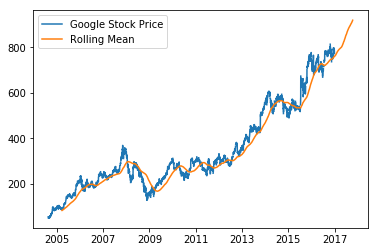

In [107]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = Google_stock.rolling(150).mean()

# this allows plots to be rendered in the notebook
%matplotlib inline 

# We import matplotlib into Python
import matplotlib.pyplot as plt


# We plot the Google stock data
plt.plot(all_stocks['Google'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()